In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import quad
import scipy.special as sc
from scipy.integrate import odeint
import process_utility as psu
import scipy.integrate as integ
from scipy.optimize import curve_fit
import time
import math
import os

In [36]:
def process_abalone_data(filename,nn=1000,nplot=5,width_calc=False):
    fvolt=(filename.split('/')[-1].split('.')[0].split('_')[7])
    fled=(filename.split('/')[-1].split('.')[0].split('_')[8])
    sipmn=(filename.split('/')[-1].split('.')[0].split('_')[4])
    sipmv=(filename.split('/')[-1].split('.')[0].split('_')[5])
    print(f'ABALONE at {fvolt}V {sipmn} at {sipmv} with {fled}')
    
    samples=1024
    data = np.fromfile(filename,  dtype=np.int16)
    n = len(data)/samples
    print(filename,'Number of events',n)
    data = np.array(np.array_split(np.array(data),n))
    
    MINs, FOMs, MAXs, INTs, width50, FWHMs = [], [], [], [], [], []
    ts = time.time()
    plt.figure(figsize=(12,6))
    if nn == 0: nn = len(data)
    for i in range(nn):
        if (i % 50000) == 0: print(f'event n. {i} time to process: {time.time()-ts:.2f}')
        bl=np.max(data[i][:])
        wf = bl-data[i]
        #max_pos = np.where(wf==np.max(wf[int(samples/2-50):int(samples/2+50)]))[0][0]
        max_pos = np.where(wf==np.max(wf))[0][0]
        area = np.sum(wf[max_pos-10:max_pos+100])
        fom = np.sum(wf[max_pos:])/area
        MINs.append(bl)
        MAXs.append(np.max(wf))
        FOMs.append(fom)
        INTs.append(area)
        fwhm = np.where(wf>np.max(wf)*0.5)[0][-1]-np.where(wf>np.max(wf)*0.5)[0][0]
        FWHMs.append(fwhm)
        if width_calc:
            ii, areafrac = 1, 0
            while areafrac < 0.5:
                ilo50, ihi50 = max_pos-ii, max_pos+ii
                areafrac = np.sum(wf[ilo50:ihi50])/area
                ii += 1
                wid50 = ihi50 - ilo50
            width50.append(wid50)
            if i < nplot: plt.plot(wf,label=f'A={area}, width={wid50}')
        else:
            if i < nplot: plt.plot(wf,label=f'A={area}, f.o.m.={fom:.2f}, fwhm={fwhm}')
    plt.legend()
    data = pd.DataFrame(columns=['area','width','peak_max','baselines','fom'])
    data['area'] = INTs
    if width_calc: data['width'] = width50
    data['peak_max'] = MAXs
    data['baselines'] = MINs
    data['fom'] = FOMs
    d_out = './processed_data'
    try: os.mkdir(d_out)
    except: pass
    data.to_hdf(f'{d_out}/ABALONE_{fvolt}V_{sipmn}_{sipmv}_{fled}.h5', key='df', mode='w')
    return np.array(MINs), np.array(FOMs), np.array(MAXs),np.array(INTs),np.array(width50),np.array(FWHMs)

ABALONE at 15kV SiPM2 at 30V with NoLED
/data/abalone/ABALONE_RampingUp/2021_06_07_T1641_SiPM2_30V_ABALONE_15k_NoLED.dat Number of events 297065.0
event n. 0 time to process: 0.00


/usr/share/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in long_scalars


event n. 50000 time to process: 3.04
event n. 100000 time to process: 6.07
event n. 150000 time to process: 9.09
event n. 200000 time to process: 12.11
event n. 250000 time to process: 15.15
ABALONE at 15kV SiPM2 at 30V with LED5V
/data/abalone/ABALONE_RampingUp/2021_06_07_T1646_SiPM2_30V_ABALONE_15k_LED5V.dat Number of events 297267.0
event n. 0 time to process: 0.00
event n. 50000 time to process: 2.97
event n. 100000 time to process: 5.94
event n. 150000 time to process: 8.90
event n. 200000 time to process: 11.85
event n. 250000 time to process: 14.83


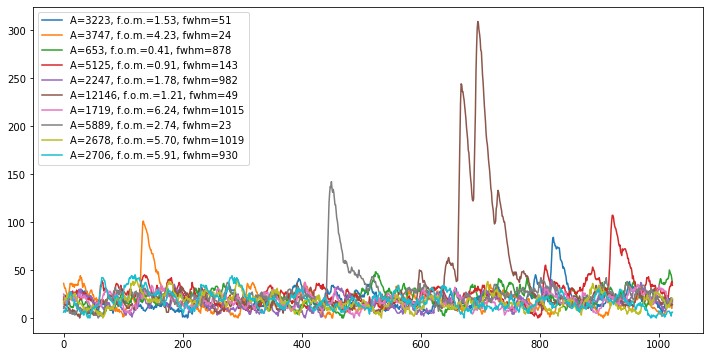

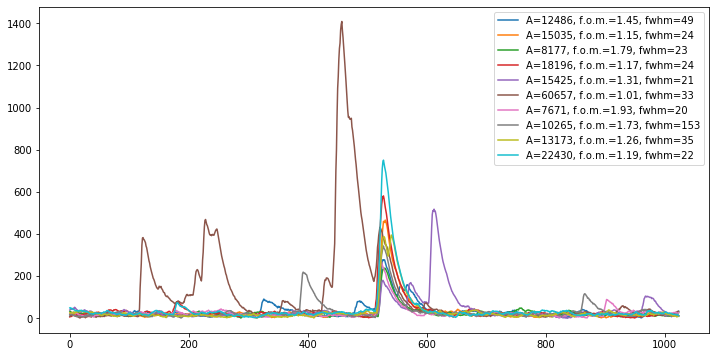

In [37]:
file18no = '/data/abalone/ABALONE_RampingUp/2021_06_07_T1627_SiPM2_30V_ABALONE_18k_NoLED.dat'
file18si = '/data/abalone/ABALONE_RampingUp/2021_06_07_T1632_SiPM2_30V_ABALONE_18k_LED5V.dat'
file15no = '/data/abalone/ABALONE_RampingUp/2021_06_07_T1641_SiPM2_30V_ABALONE_15k_NoLED.dat'
file15si = '/data/abalone/ABALONE_RampingUp/2021_06_07_T1646_SiPM2_30V_ABALONE_15k_LED5V.dat'
MINs1, FOMs1, MAXs1, INTs1, width501, FWHMs1 = process_abalone_data(filename=file15no,nn=0,nplot=10)
MINs2, FOMs2, MAXs2, INTs2, width502, FWHMs2 = process_abalone_data(filename=file15si,nn=0,nplot=10)

In [ ]:
psu.plot_waveforms2( wfs_cut_max, events = 10 )

In [48]:
def plot_area_spectrum(AREAs1,AREAs2,bins=200):
    area_space = np.logspace(2.5,5, bins)
    plt.figure(figsize=(12,6))
    a=plt.hist(AREAs1,bins=area_space,histtype='step',lw=2,label='15kV NoLED')
    a=plt.hist(AREAs2,bins=area_space,histtype='step',lw=2,label='15kV LED5V')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('area')
    plt.xlabel('ADC channels',ha='right',x=1)
    plt.ylabel('counts',ha='right',y=1)
    plt.legend(fontsize=14)

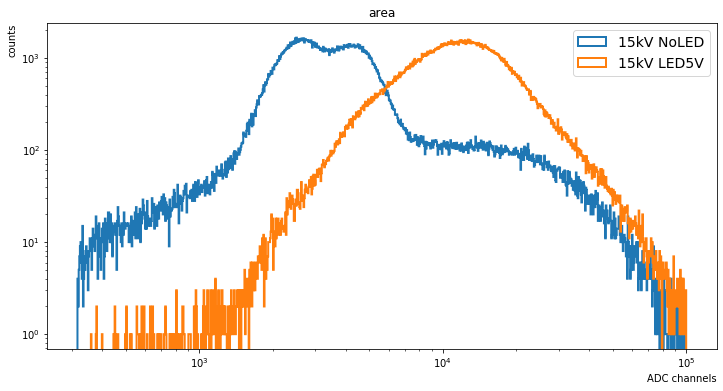

In [49]:
plot_area_spectrum(INTs1,INTs2,bins=1000)

In [50]:
def plot_area_max(AREAs,MAXs,bins=200,volts=10):
    area_space = np.logspace(3.5,7, bins)
    max_space = np.logspace(1.5,4.5,bins)
    plt.figure(figsize=(12,6))
    a=plt.hist2d(AREAs,MAXs,bins=(area_space,max_space),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('area (chn)',ha='right',x=1,fontsize=12)
    plt.ylabel('peak max (chn)',ha='right',y=1,fontsize=12)
    plt.title(f'ABALONE at {volts} kV')
    
def plot_area_fom(AREAs,FOMs,bins=200,volts=10):
    area_space = np.logspace(3.5,7, bins)
    plt.figure(figsize=(12,6))
    a=plt.hist2d(AREAs,FOMs,bins=(area_space,bins),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.xlabel('area',ha='right',x=1,fontsize=12)
    plt.ylabel('FOM',ha='right',y=1,fontsize=12)
    plt.title(f'ABALONE at {volts} kV')
    
def plot_area_width(AREAs,width50,bins=200,volts=10):
    area_space = np.logspace(3.5,7, bins)
    width_space = np.logspace(1.5,3.5, bins)
    plt.figure(figsize=(12,6))
    a=plt.hist2d(AREAs,width50,bins=(area_space,width_space),norm=matplotlib.colors.LogNorm())
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('area',ha='right',x=1,fontsize=12)
    plt.ylabel('width 50%',ha='right',y=1,fontsize=12)
    plt.title(f'ABALONE at {volts} kV')

In [51]:
def plot_data(fvolt=16,sipmn=2,sipmv=30,fled='NoLED'):
    data = pd.read_hdf(f'processed_data/ABALONE_{fvolt}kV_SiPM{sipmn}_{sipmv}V_{fled}.h5')
    #plot_area_spectrum(data['area'])
    plot_area_max(data['area'],data['peak_max'],bins=200,volts=fvolt)
    plot_area_fom(data['area'],data['fom'],bins=200,volts=fvolt)
    #plot_area_width(INTs,FWHMs,bins=200,volts=volts)

ValueError: autodetected range of [0.09535603715170278, inf] is not finite

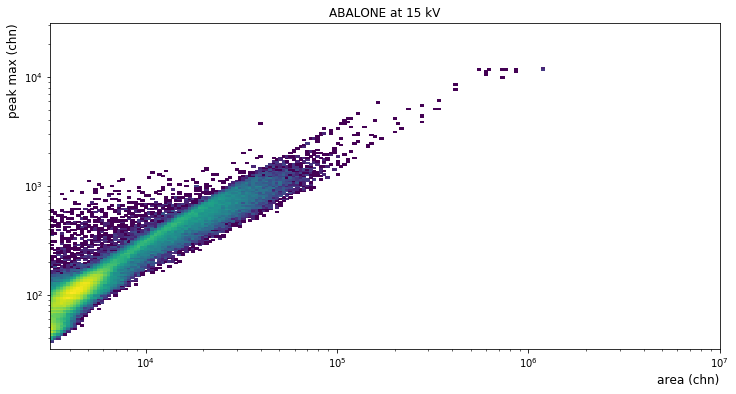

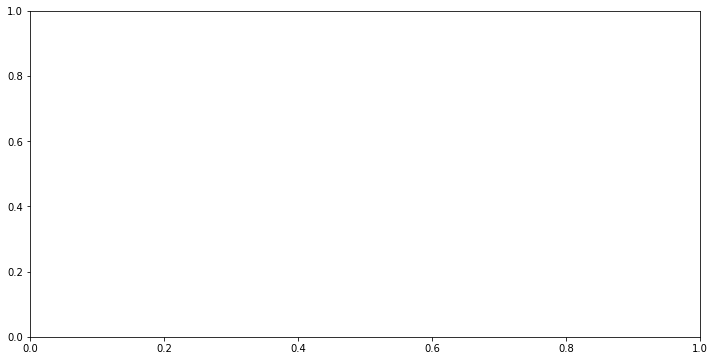

In [52]:
plot_data(fvolt=15,sipmn=2,sipmv=30,fled='NoLED')

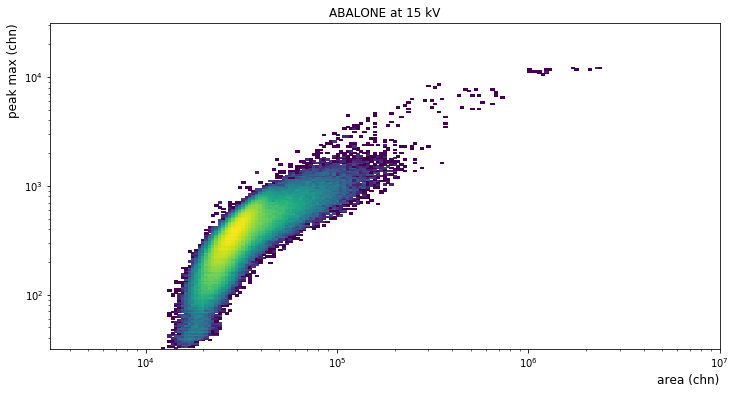

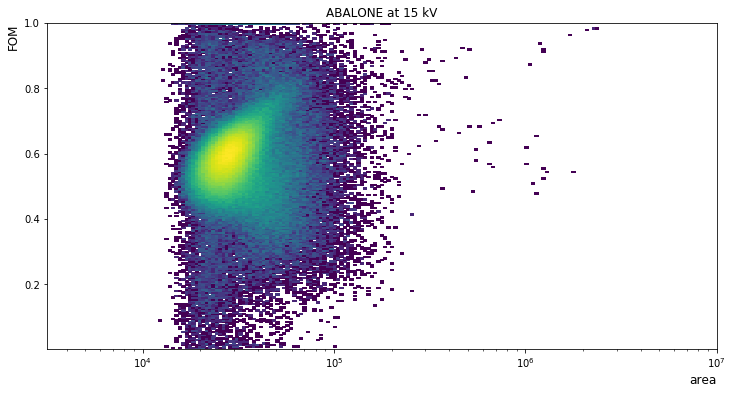

In [22]:
plot_data(fvolt=15,sipmn=2,sipmv=30,fled='LED5V')

In [8]:
def select_data(fvolt=16,sipmn=2,sipmv=30,fled='NoLED',max_cut=5e3,area_cut=1e4):
    data = pd.read_hdf(f'processed_data/ABALONE_{fvolt}kV_SiPM{sipmn}_{sipmv}V_{fled}.h5')
    wfs = psu.read_file(f'/data/abalone/ABALONE_RampingUp/2021_05_18_T1415_SiPM{sipmn}_{sipmv}V_ABALONE_{fvolt}k_{fled}.dat')
    plot_area_spectrum(data['area'])
    wfs_cut_max = wfs[data['peak_max']>max_cut]
    psu.plot_waveforms2( wfs_cut_max, events = 10 )
    print('Events selected with max cut',len(wfs_cut_max),'->',len(wfs_cut_max)/len(wfs)*100,'%')
    wfs_cut_area = wfs[data['area']>area_cut]
    psu.plot_waveforms2( wfs_cut_area, events = 10 )
    print('Events selected with area cut',len(wfs_cut_area),'->',len(wfs_cut_area)/len(wfs)*100,'%')

/data/abalone/ABALONE_RampingUp/2021_05_18_T1415_SiPM2_30V_ABALONE_16k_NoLED.dat Number of events 683364.0
Events selected with max cut 409 -> 0.05985097254172008 %
Events selected with area cut 674815 -> 98.74898297247148 %


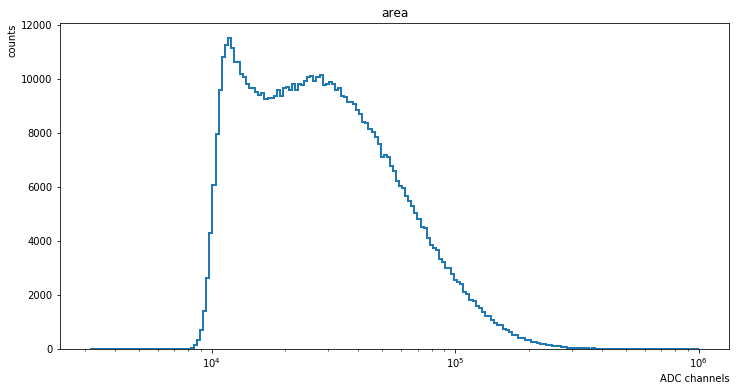

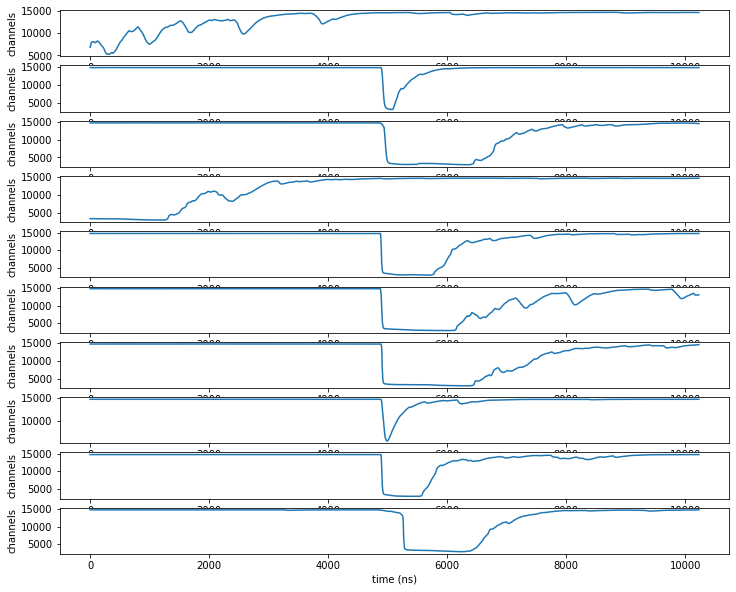

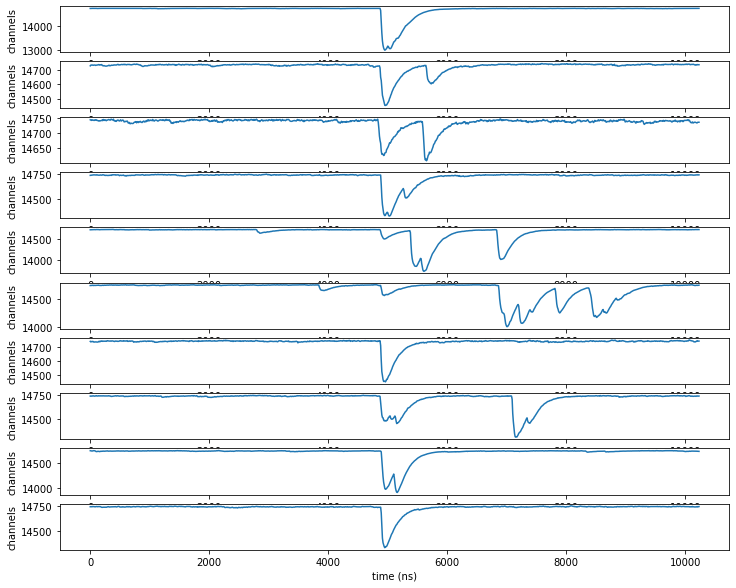

In [14]:
select_data(fvolt=16,sipmn=2,sipmv=30,fled='NoLED',max_cut=5e3)